## 임포트

## (PJT 2)날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train - 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [ ]:
# 캐글에서 데이터 직접 다운로드 후 구글드라이브에 업로드했음!

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [154]:
# 파일 불러오기
file_path = '/content/drive/MyDrive/github/아이펠/data/bike-sharing-demand/train.csv'
df = pd.read_csv(file_path)

# datetime 자료형으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

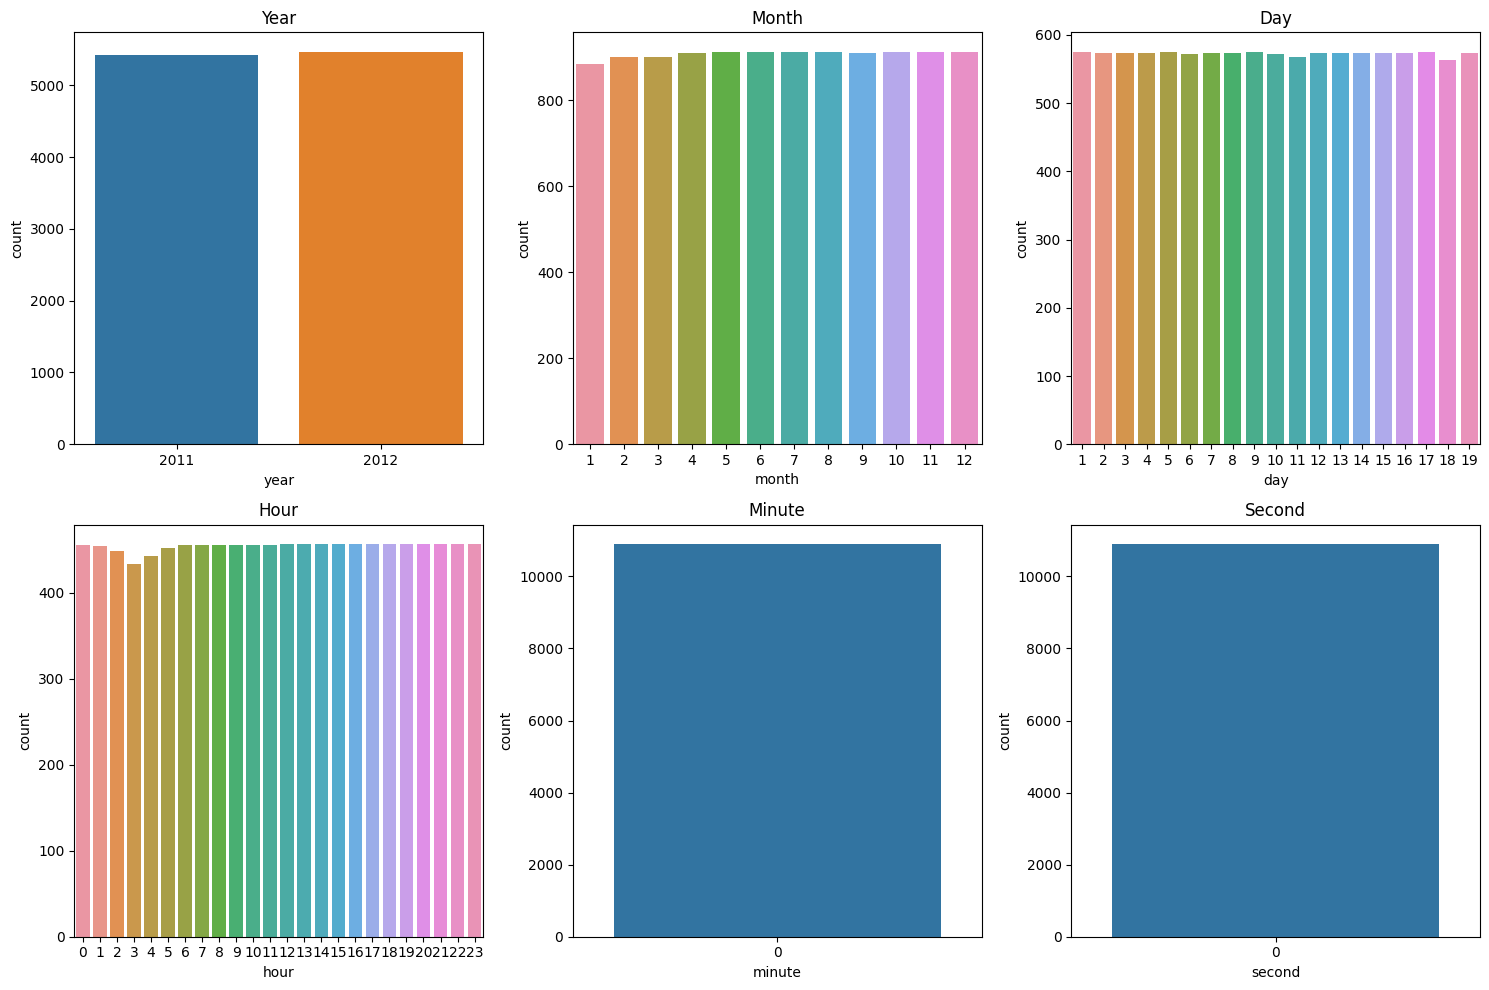

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 나란히 표시하기 위한 subplot 설정
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# year, month, day, hour, minute, second 컬럼에 대한 countplot 그래프 생성
sns.countplot(ax=axes[0, 0], data=df, x='year')
sns.countplot(ax=axes[0, 1], data=df, x='month')
sns.countplot(ax=axes[0, 2], data=df, x='day')
sns.countplot(ax=axes[1, 0], data=df, x='hour')
sns.countplot(ax=axes[1, 1], data=df, x='minute')
sns.countplot(ax=axes[1, 2], data=df, x='second')

# 그래프 타이틀 설정
axes[0, 0].set_title('Year')
axes[0, 1].set_title('Month')
axes[0, 2].set_title('Day')
axes[1, 0].set_title('Hour')
axes[1, 1].set_title('Minute')
axes[1, 2].set_title('Second')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


### (4) X, y 컬럼 선택 및 train/test 데이터 분리
- (feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [156]:
# train/test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(df.drop('count',axis=1), df['count'], test_size=0.2, random_state=42)

# X, y 컬럼 선택 & feature(X)와 target(y) 컬럼 선택
features = ['registered', 'casual', 'hour', 'humidity', 'temp', 'atemp']

# feature(X)와 target(y) 데이터 분리
x = x_train[features]

In [157]:
df.corr()['count'].sort_values().to_frame()

<ipython-input-157-2bb15c6fbd22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count'].sort_values().to_frame()


,count
humidity,-0.317371
weather,-0.128655
holiday,-0.005393
workingday,0.011594
day,0.019826
windspeed,0.101369
season,0.163439
month,0.166862
year,0.260403
atemp,0.389784


### (5) LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [158]:
# LinearRegression 모델 인스턴스화
model = LinearRegression()

# 모델 학습
model.fit(x, y_train)


LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [159]:
# X_test에 대한 예측값 출력
y_pred = model.predict(x_test[features])

# 손실함수 값 계산 (예시로 평균제곱오차(Mean Squared Error) 사용)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('손실함수(MSE):', mse)
print('손실함수(RMSE):', rmse)


손실함수(MSE): 1.0032296411694661e-26
손실함수(RMSE): 1.0016135188631721e-13


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

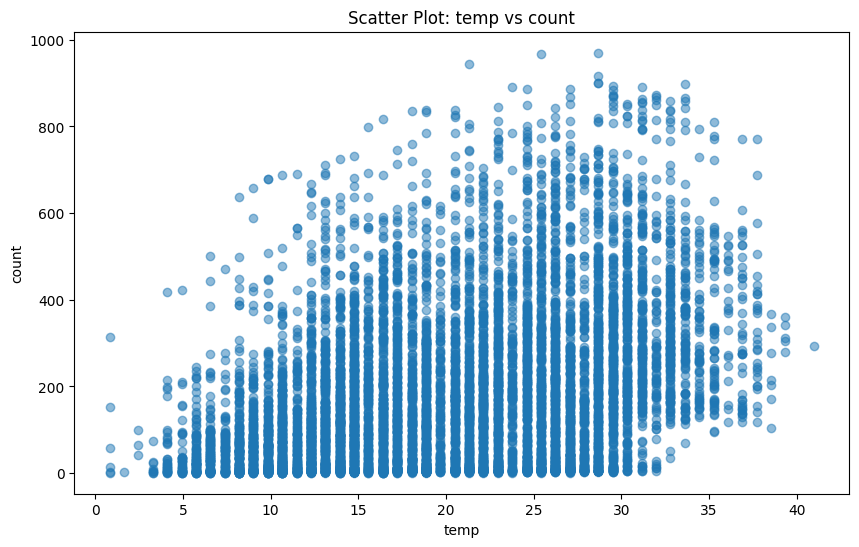

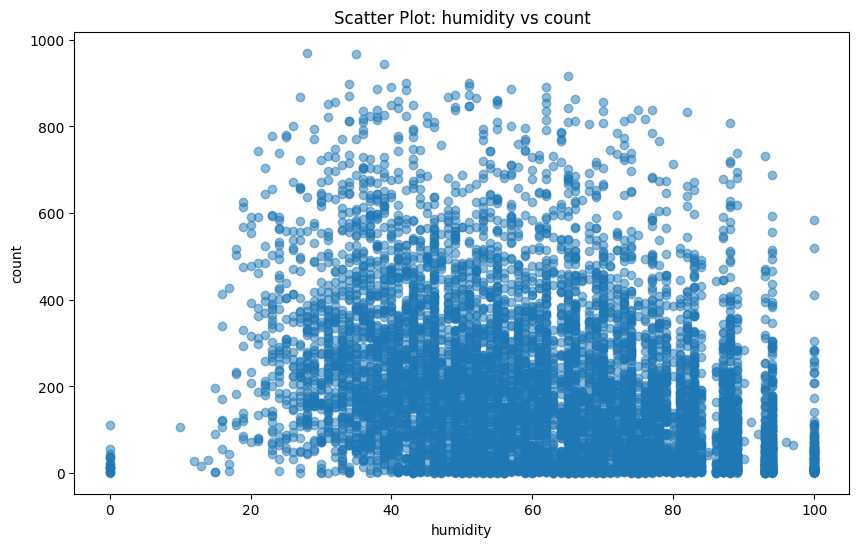

In [160]:
# 시각화 (x축: temp, y축: count)
plt.figure(figsize=(10, 6))
plt.scatter(x['temp'], y_train, alpha=0.5)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('Scatter Plot: temp vs count')
plt.show()

# 시각화 (x축: humidity, y축: count)
plt.figure(figsize=(10, 6))
plt.scatter(x['humidity'], y_train, alpha=0.5)
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('Scatter Plot: humidity vs count')
plt.show()
